<a href="https://colab.research.google.com/github/aashritanimms-svg/Obesity1/blob/main/Obesity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the data
df=pd.read_csv('ObesityData.csv')

In [ ]:
df.head(10)

,Gender,Age,Height,Weight,FamilyObesity,HighCalorie,Veggie,MainMeals,ExtraFood,Smoke,Water,MonitorCalorie,PhysicalActivity,TechUse,Alcohol,Transport
0,Female,22,62.99,180.81,yes,yes,Never,1,Sometimes,no,1-2 Lt,no,No,Frequently,Sometimes,Public_Transportation
1,Male,29,69.68,183.02,no,yes,Never,4,Frequently,no,Greater than 3 Lt,no,No,Sometimes,no,Motorbike
2,Female,21,65.35,141.12,yes,yes,Never,3,Sometimes,no,Less than 1 Lt,no,No,No,no,Public_Transportation
3,Male,21,71.26,176.40,no,no,Never,3,no,no,1-2 Lt,no,Frequently,No,no,Public_Transportation
4,Male,21,71.65,158.76,yes,yes,Never,3,Frequently,no,Greater than 3 Lt,no,Frequently,No,Sometimes,Public_Transportation
5,Male,21,68.90,158.76,yes,yes,Never,3,Frequently,no,Greater than 3 Lt,no,Frequently,No,Sometimes,Public_Transportation
6,Female,21,63.78,152.15,yes,yes,Never,3,Frequently,no,1-2 Lt,no,No,Sometimes,no,Public_Transportation
7,Male,23,70.87,198.45,yes,yes,Never,3,Always,no,1-2 Lt,no,No,Frequently,Frequently,Public_Transportation
8,Male,30,69.29,246.96,yes,yes,Never,3,no,yes,1-2 Lt,yes,No,No,Frequently,Automobile
9,Male,23,73.62,209.48,yes,yes,Never,3,Frequently,no,1-2 Lt,no,No,Frequently,Frequently,Public_Transportation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            2083 non-null   object 
 1   Age               2083 non-null   int64  
 2   Height            2083 non-null   float64
 3   Weight            2083 non-null   float64
 4   FamilyObesity     2083 non-null   object 
 5   HighCalorie       2083 non-null   object 
 6   Veggie            2083 non-null   object 
 7   MainMeals         2083 non-null   int64  
 8   ExtraFood         2083 non-null   object 
 9   Smoke             2083 non-null   object 
 10  Water             2083 non-null   object 
 11  MonitorCalorie    2083 non-null   object 
 12  PhysicalActivity  2083 non-null   object 
 13  TechUse           2083 non-null   object 
 14  Alcohol           2083 non-null   object 
 15  Transport         2083 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [ ]:
def calculate_bmi(weight, height):




    return (weight / (height * height)) * 703


# Apply the function to the DataFrame
df['BMI'] = df.apply(lambda row: calculate_bmi(row['Weight'], row['Height']), axis=1)
df['BMI'] = df['BMI'].apply(lambda x: round(x)) # Round off BMI to nearest whole number

In [ ]:
df['ObesityStatus'] = np.where(df['BMI'] >= 30, 'Obese', 'Non-Obese')

In [ ]:
df.head()

,Gender,Age,Height,Weight,FamilyObesity,HighCalorie,Veggie,MainMeals,ExtraFood,Smoke,Water,MonitorCalorie,PhysicalActivity,TechUse,Alcohol,Transport,BMI,ObesityStatus
0,Female,22,62.99,180.81,yes,yes,Never,1,Sometimes,no,1-2 Lt,no,No,Frequently,Sometimes,Public_Transportation,32,Obese
1,Male,29,69.68,183.02,no,yes,Never,4,Frequently,no,Greater than 3 Lt,no,No,Sometimes,no,Motorbike,26,Non-Obese
2,Female,21,65.35,141.12,yes,yes,Never,3,Sometimes,no,Less than 1 Lt,no,No,No,no,Public_Transportation,23,Non-Obese
3,Male,21,71.26,176.40,no,no,Never,3,no,no,1-2 Lt,no,Frequently,No,no,Public_Transportation,24,Non-Obese
4,Male,21,71.65,158.76,yes,yes,Never,3,Frequently,no,Greater than 3 Lt,no,Frequently,No,Sometimes,Public_Transportation,22,Non-Obese


In [ ]:
df.to_csv('ObesityDataUpdated.csv', index=False)

In [ ]:
df=pd.read_csv('ObesityDataUpdated.csv')

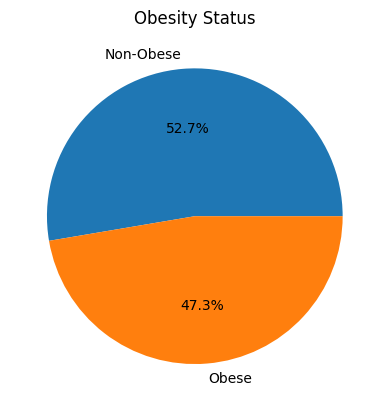

In [ ]:
ObesityStatusCounts = df['ObesityStatus'].value_counts()
plt.pie(ObesityStatusCounts, labels=ObesityStatusCounts.index, autopct='%1.1f%%')
plt.title('Obesity Status')
plt.show()

In [ ]:
#Numerical and Categorical

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Age', 'Height', 'Weight', 'MainMeals', 'BMI']

We have 13 categorical features : ['Gender', 'FamilyObesity', 'HighCalorie', 'Veggie', 'ExtraFood', 'Smoke', 'Water', 'MonitorCalorie', 'PhysicalActivity', 'TechUse', 'Alcohol', 'Transport', 'ObesityStatus']


In [ ]:
# Chi square test for categorical variables
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [ ]:
categorical_columns = ['Gender', 'FamilyObesity', 'HighCalorie', 'Veggie', 'ExtraFood',
                      'Smoke', 'Water', 'MonitorCalorie', 'PhysicalActivity', 'TechUse', 'Alcohol',
                      'Transport'
]

In [ ]:
for column in categorical_columns:
   contingency_table = pd.crosstab(df[column], df['ObesityStatus'])
   print('-------------------------------------------------------')
   print(f"Cross Tab for {column}:")
   print(contingency_table)
   chi2, p, dof, expected = chi2_contingency(contingency_table)
   print(f"Chi2: {chi2}, p-value: {p.round(4)}, dof: {dof}")

-------------------------------------------------------
Cross Tab for Gender:
ObesityStatus  Non-Obese  Obese
Gender                         
Female               547    486
Male                 550    500
Chi2: 0.047245774916024615, p-value: 0.8279, dof: 1
-------------------------------------------------------
Cross Tab for FamilyObesity:
ObesityStatus  Non-Obese  Obese
FamilyObesity                  
no                   353     11
yes                  744    975
Chi2: 345.292491642919, p-value: 0.0, dof: 1
-------------------------------------------------------
Cross Tab for HighCalorie:
ObesityStatus  Non-Obese  Obese
HighCalorie                    
no                   218     25
yes                  879    961
Chi2: 149.77976282190556, p-value: 0.0, dof: 1
-------------------------------------------------------
Cross Tab for Veggie:
ObesityStatus  Non-Obese  Obese
Veggie                         
Never                 63     38
Sometimes            592    400
always              

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [ ]:
#Read the data
df = pd.read_csv('ObesityDataUpdated.csv')

   PhysicalActivity  HighCalorie  ObesityStatus
0                 0            1              1
1                 0            1              0
2                 0            1              0
3                 2            0              0
4                 2            1              0
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.86      0.28      0.42       345
           1       0.51      0.95      0.67       280

    accuracy                           0.58       625
   macro avg       0.69      0.61      0.54       625
weighted avg       0.71      0.58      0.53       625

Confusion Matrix:
[[ 95 250]
 [ 15 265]]
Sensitivity (Recall): 0.95
Specificity: 0.28


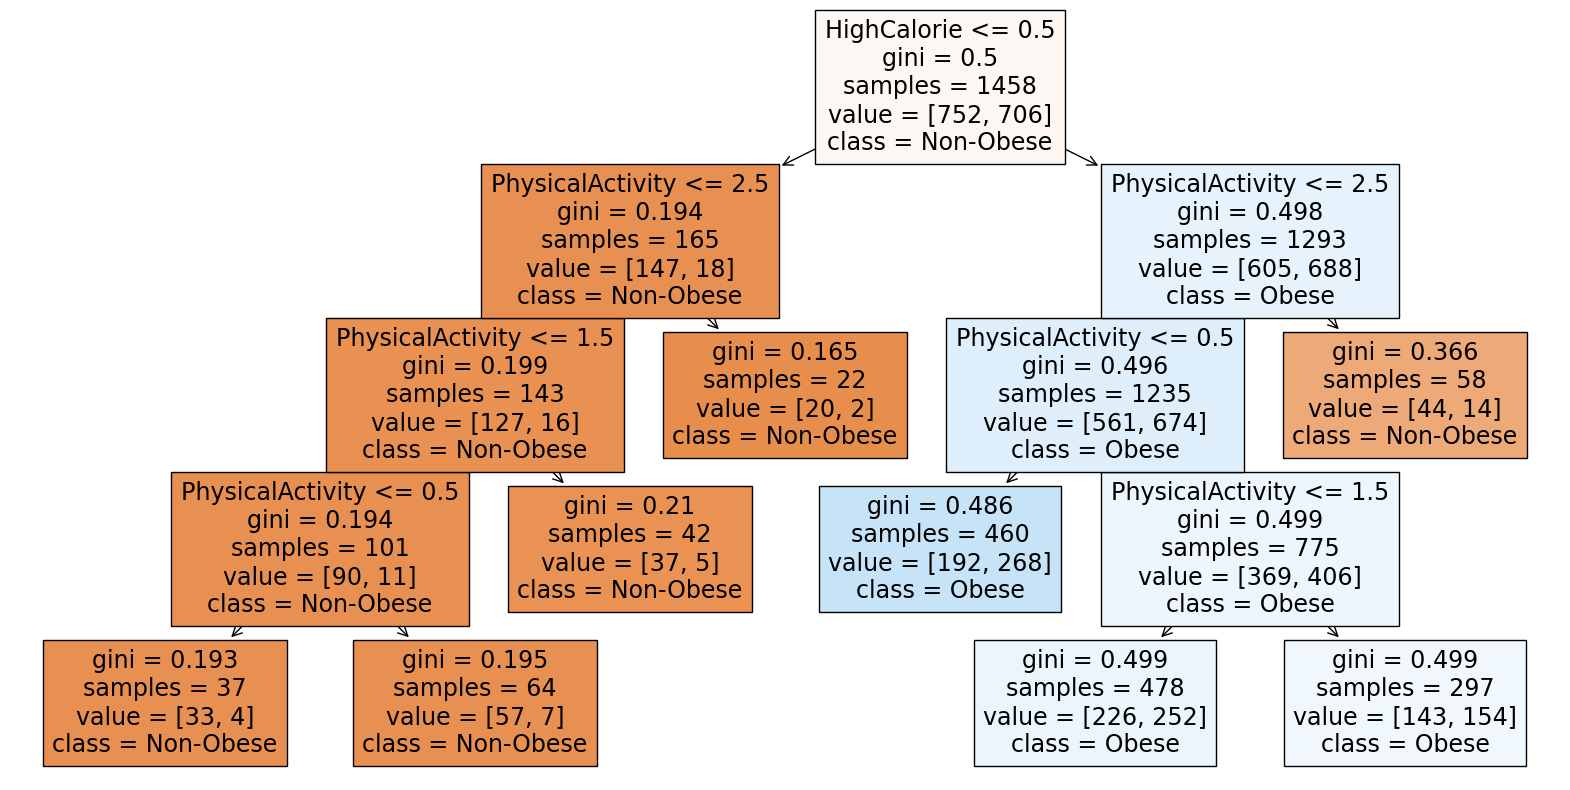

In [ ]:
# Define the relevant features and the target
features = ['PhysicalActivity', 'HighCalorie']




# Manually encode the ordinal variable 'PhysicalActivity'
physical_activity_mapping = {
   'No': 0,
   'Sometimes': 1,
   'Frequently': 2,
   'Always': 3
}
df['PhysicalActivity'] = df['PhysicalActivity'].map(physical_activity_mapping)



target = 'ObesityStatus'
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])








high_calorie_mapping = {
   'no': 0,
   'yes': 1
}
df['HighCalorie'] = df['HighCalorie'].map(high_calorie_mapping)




print(df[features + [target]].head())






# Define features (X) and target (y)
X = df[features]
y = df[target]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)


# Train the classifier
clf.fit(X_train, y_train)


# Predict the target for the test set
y_pred = clf.predict(X_test)


# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# Display the classification report
print(classification_report(y_test, y_pred))


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


# Calculate sensitivity and specificity
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')


# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()


In [ ]:
df=pd.read_csv('/content/ObesityDataUpdated.csv')

   PhysicalActivity  HighCalorie  FamilyObesity  MainMeals  ObesityStatus
0                 0            1              1          1              1
1                 0            1              0          4              0
2                 0            1              1          3              0
3                 2            0              0          3              0
4                 2            1              1          3              0
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       345
           1       0.66      0.87      0.75       280

    accuracy                           0.74       625
   macro avg       0.76      0.76      0.74       625
weighted avg       0.77      0.74      0.74       625

Sensitivity (Recall): 0.87
Specificity: 0.64


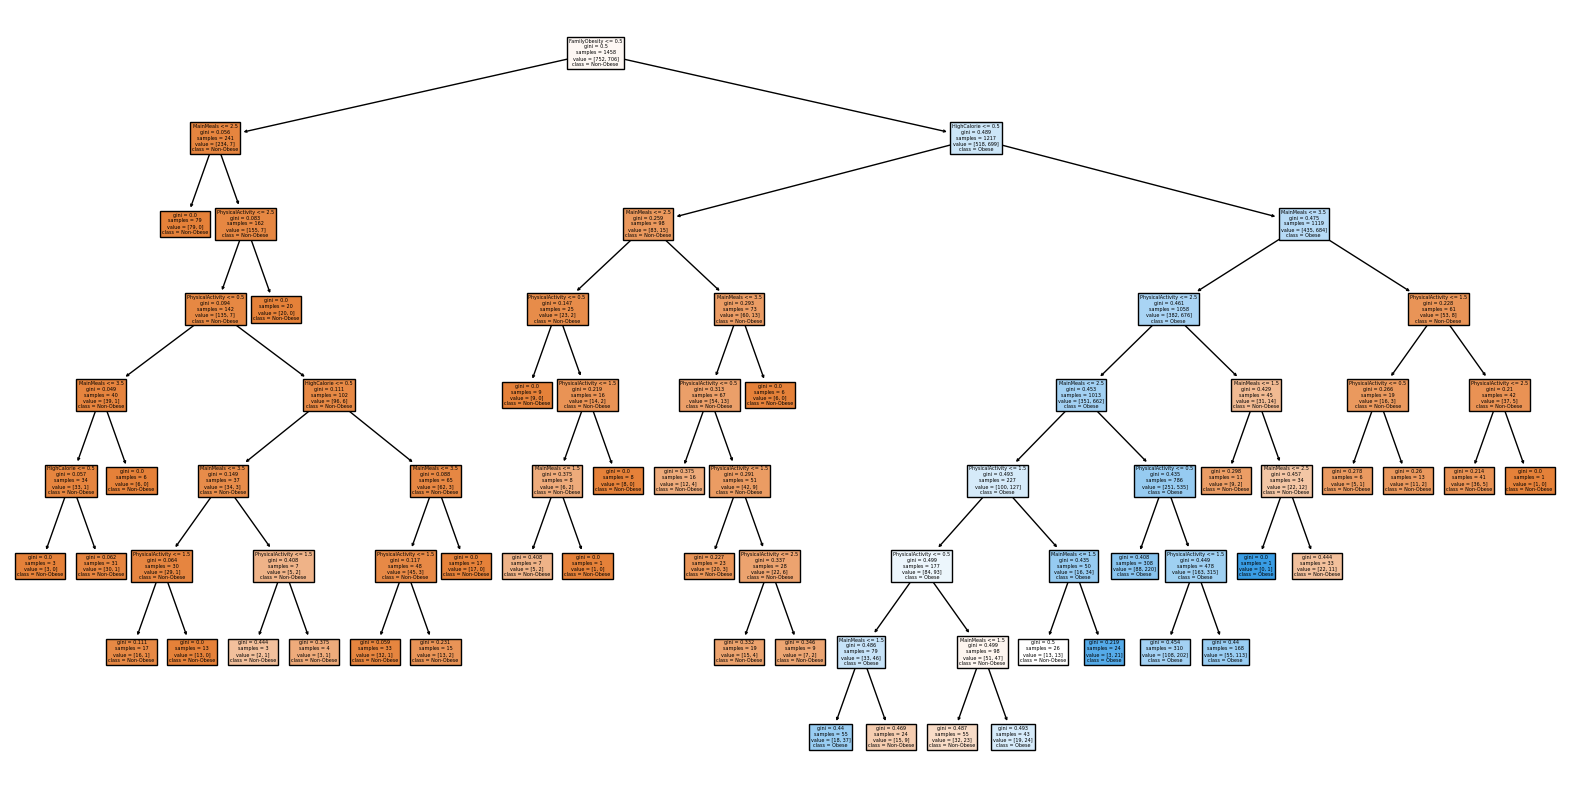

In [ ]:


# Define the relevant features and the target
features = ['PhysicalActivity', 'HighCalorie', 'FamilyObesity', 'MainMeals']
target = 'ObesityStatus'  # Corrected based on actual column names


# Manually encode the ordinal variable 'PhysicalActivity'
physical_activity_mapping = {
   'No': 0,
   'Sometimes': 1,
   'Frequently': 2,
   'Always': 3
}
df['PhysicalActivity'] = df['PhysicalActivity'].map(physical_activity_mapping)


# Encode the 'HighCalorie' variable
high_calorie_mapping = {
   'no': 0,
   'yes': 1
}
df['HighCalorie'] = df['HighCalorie'].map(high_calorie_mapping)


# Encode the 'FamilyObesity' variable
family_obesity_mapping = {
   'no': 0,
   'yes': 1
}
df['FamilyObesity'] = df['FamilyObesity'].map(family_obesity_mapping)


# Encode the 'MainMeals' variable
main_meals_mapping = {
   '1': 1,
   '2': 2,
   '3': 3,
   'more than 3': 4
}
df["MainMeals"] = df['MainMeals'].replace(main_meals_mapping).astype(int)


# Encode the target variable
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])


# Display the first few rows of the processed dataset
print(df[features + [target]].head())


# Define features (X) and target (y)
X = df[features]
y = df[target]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)


# Train the classifier
clf.fit(X_train, y_train)


# Predict the target for the test set
y_pred = clf.predict(X_test)


# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# Display the classification report
print(classification_report(y_test, y_pred))


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Calculate sensitivity and specificity
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')


# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()


            Feature  Importance
2     FamilyObesity    0.546797
3         MainMeals    0.208536
1       HighCalorie    0.173211
0  PhysicalActivity    0.071455


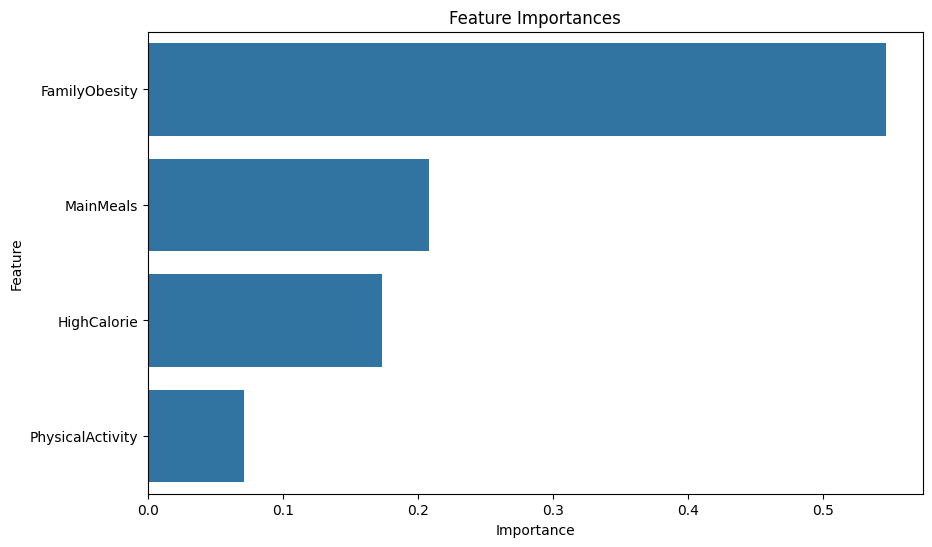

In [ ]:
# Assess feature importance
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})


# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Display feature importances
print(importance_df)


# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

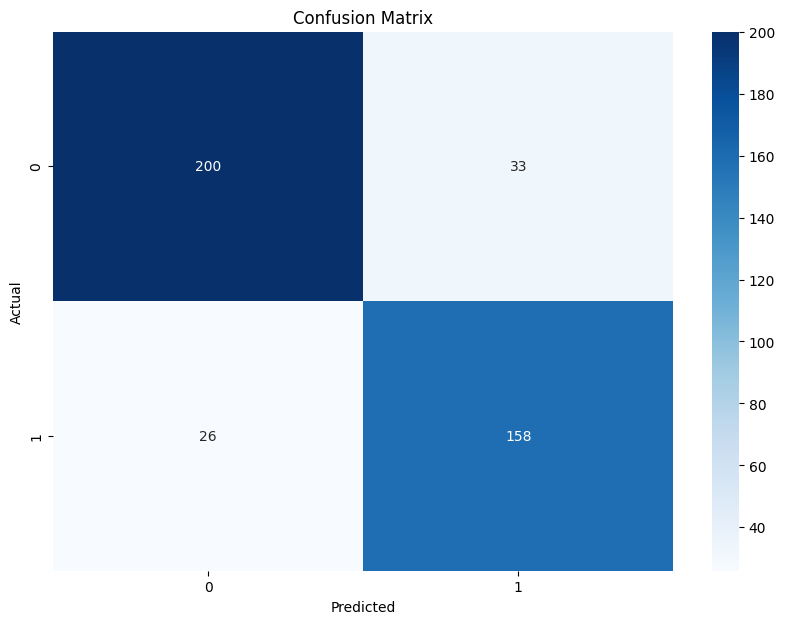

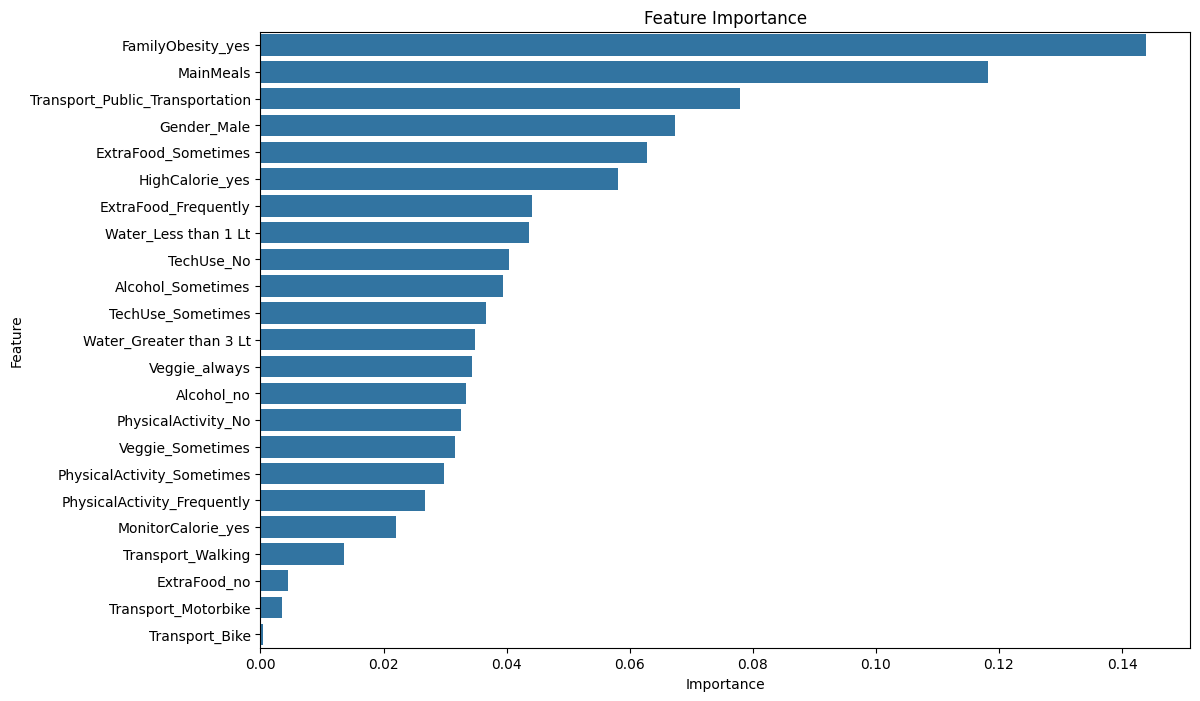

Accuracy: 0.8585131894484412
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.86      0.87       233
        True       0.83      0.86      0.84       184

    accuracy                           0.86       417
   macro avg       0.86      0.86      0.86       417
weighted avg       0.86      0.86      0.86       417



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = 'ObesityDataUpdated.csv'
data = pd.read_csv(file_path)


# Preprocess the data
# Exclude specified columns
data = data.drop(columns=['Age', 'Smoke', 'BMI', 'Height', 'Weight'])


# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)


# Split the data into features and target
X = data_encoded.drop(columns=['ObesityStatus_Obese'])
y = data_encoded['ObesityStatus_Obese']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


# Make predictions
y_pred = rf_classifier.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Compute feature importance
feature_importance = rf_classifier.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)


# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


# Display performance metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


